In [1]:
from netCDF4 import Dataset
import netCDF4
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from datetime import datetime, timezone
import nc_time_axis

atmos_epoch = datetime(1900, 1, 1, 0, 0, tzinfo=timezone.utc)

In [4]:
observational_geopotential = Dataset('../data/geopotential_height_500hPa_era5_6hourly_z0001_daymean_2019_beginAdjust.nc', mode='r')

observational_labels = Dataset('../data/labels/GTD_1979-2019_JJAextd_8.nc', mode='r')

In [5]:
long = observational_geopotential.variables['longitude']
lat = observational_geopotential.variables['latitude']
zg = observational_geopotential.variables['z_0001']
time_raw = observational_geopotential.variables["time"]
time = netCDF4.num2date(time_raw[:], time_raw.units, time_raw.calendar)

In [6]:
mean_mask = np.array(np.zeros((98, len(lat), len(long))))
zg_mean = np.array(np.zeros((len(time), len(lat), len(long))))

years = int(len(time) / 98) # number of days per year

for j in range(2):
    offset = 98 * j
    for i in range(98):
        mean_mask[i] = np.mean([zg[offset + i], zg[offset + 98 + i], zg[offset + 98 * 2 + i], zg[offset + 98 * 3 + i], zg[offset + 98 * 4 + i]])
        zg_mean[offset + i] = np.subtract(zg[offset + i], mean_mask[i])

for j in range(2, years-2):
    offset = 98 * j
    for i in range(98):
        mean_mask[i] = np.mean([zg[offset + i], zg[offset - 98 + i], zg[offset - 98 * 2 + i], zg[offset + 98 + i], zg[offset + 98 * 2 + i]])
        zg_mean[offset + i] = np.subtract(zg[offset + i], mean_mask[i])

for j in range(years-2, years):
    offset = 98 * j
    for i in range(98):
        if (offset + i >= len(time)): break
        mean_mask[i] = np.mean([zg[offset + i], zg[offset - 98 + i], zg[offset - 98 * 2 + i], zg[offset - 98 * 3 + i], zg[offset - 98 * 4 + i]])
        zg_mean[offset + i] = np.subtract(zg[offset + i], mean_mask[i])

print(zg_mean.shape)

(4018, 281, 1440)


In [7]:
import os

try:
    os.remove('../data/geopotential_height_500hPa_era5_6hourly_z0001_daymean_final.nc')
except:
    pass

ncfile = Dataset('../data/geopotential_height_500hPa_era5_6hourly_z0001_daymean_final.nc', mode='w', format='NETCDF4')

ncfile.set_fill_off()

ncfile.createDimension("time", None)
ncfile.createDimension("longitude", 1440)
ncfile.createDimension("latitude", 281)
ncfile.createDimension("day_range", 5)

variable = ncfile.createVariable("time", "i4", ("time",))
variable.setncatts({k: observational_geopotential.variables["time"].getncattr(k) for k in observational_geopotential.variables["time"].ncattrs()})
ncfile.createVariable("day_range", "i4", ("day_range",))
variable = ncfile.createVariable("longitude", "f4", ("longitude",))
variable.setncatts({k: observational_geopotential.variables["longitude"].getncattr(k) for k in observational_geopotential.variables["longitude"].ncattrs()})
variable = ncfile.createVariable("latitude", "f4", ("latitude",))
variable.setncatts({k: observational_geopotential.variables["latitude"].getncattr(k) for k in observational_geopotential.variables["latitude"].ncattrs()})
variable = ncfile.createVariable("z_0001", "f4", ("time", "day_range", "longitude", "latitude"))
# variable.setncatts({k: observational_geopotential.variables["z_0001"].getncattr(k) for k in observational_geopotential.variables["z_0001"].ncattrs()})

# for v_name, varin in observational_geopotential.variables.items():
#     if v_name in ["time_bnds"]: continue
#     fill_value = None
    
#     if hasattr(varin, "_FillValue"):
#         fill_value = varin._FillValue
#     if v_name in ["z_0001"]:
#         outVar = ncfile.createVariable(v_name, varin.datatype, ("time", "day_range", "longitude", "latitude"), fill_value=fill_value)
#     else:
#         outVar = ncfile.createVariable(v_name, varin.datatype, varin.dimensions, fill_value=fill_value)
    
#     # Copy variable attributes
#     outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs() if k not in ["_FillValue", "add_offset", "scale_factor"]})

result = np.zeros((len(time), 5, len(lat), len(long)))

temp_zg = zg_mean
for i in range(len(time)):
    if (i % 5 == 0): print("working on " + str(i) + " of " + str(len(time)))
    if len(temp_zg) < 5:
        ncfile.variables["z_0001"][i] = np.array([temp_zg[0], temp_zg[0], temp_zg[0], temp_zg[0], temp_zg[0]])
    else:
        ncfile.variables["z_0001"][i] = np.array([temp_zg[0], temp_zg[0 + 1], temp_zg[0 + 2], temp_zg[0 + 3], temp_zg[0 + 4]])
    temp_zg = temp_zg[1:]
print(result.shape)

ncfile.variables["time"][:] = time_raw[:]
ncfile.variables["longitude"][:] = long[:]
ncfile.variables["latitude"][:] = lat[:]
ncfile.variables["day_range"][:] = [0, 1, 2, 3, 4]

ncfile.close()

working on 0 of 4018
working on 5 of 4018
working on 10 of 4018
working on 15 of 4018
working on 20 of 4018
working on 25 of 4018
working on 30 of 4018
working on 35 of 4018
working on 40 of 4018
working on 45 of 4018
working on 50 of 4018
working on 55 of 4018
working on 60 of 4018
working on 65 of 4018
working on 70 of 4018
working on 75 of 4018
working on 80 of 4018
working on 85 of 4018
working on 90 of 4018
working on 95 of 4018
working on 100 of 4018
working on 105 of 4018
working on 110 of 4018
working on 115 of 4018
working on 120 of 4018
working on 125 of 4018
working on 130 of 4018
working on 135 of 4018
working on 140 of 4018
working on 145 of 4018
working on 150 of 4018
working on 155 of 4018
working on 160 of 4018
working on 165 of 4018
working on 170 of 4018
working on 175 of 4018
working on 180 of 4018
working on 185 of 4018
working on 190 of 4018
working on 195 of 4018
working on 200 of 4018
working on 205 of 4018
working on 210 of 4018
working on 215 of 4018
working on

AttributeError: NetCDF: Attribute not found

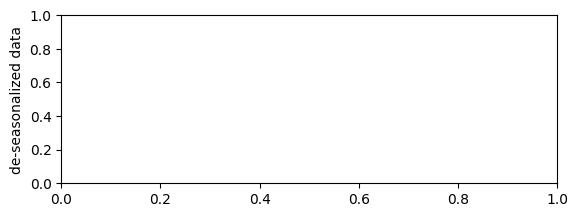

In [8]:
data = Dataset('../data/geopotential_height_500hPa_era5_6hourly_z0001_daymean_final.nc', mode='r')

plt.subplot(2, 1, 2)
plt.ylabel("de-seasonalized data")
time = netCDF4.num2date(data.variables["time"][:], data.variables["time"].units, data.variables["time"].calendar)
plt.plot(time[::10], np.mean(data.variables["z_0001"][::10], axis=(1, 2)))
plt.show()